In [14]:
!cp Untitled4.ipynb semi

In [ ]:
#001 外部モジュールのimport
########################################

# 行列計算モジュール
import numpy as np

# グラフ表示／画像表示用モジュール
import matplotlib.pyplot as plt

# 画像処理用モジュール
import cv2

# ディープラーニング用モジュール
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, InputLayer


情報確認：
x_train：　(60000, 28, 28)
x_test：　(10000, 28, 28)
y_train：　(60000,)
y_test：　(10000,)


x_train, y_trainの内容：


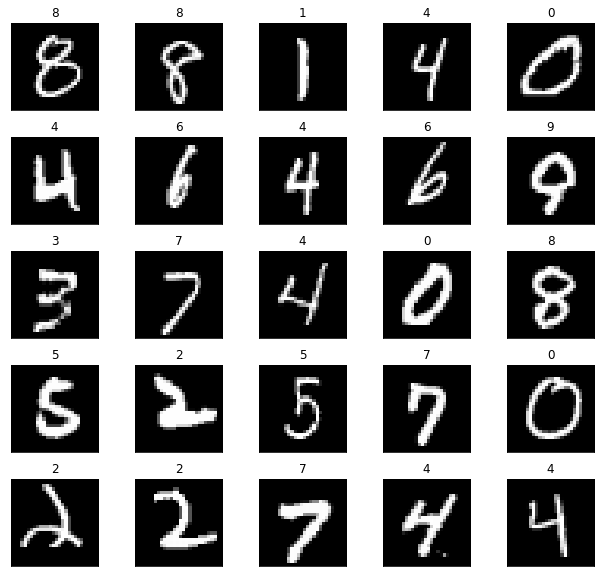



x_test, y_test


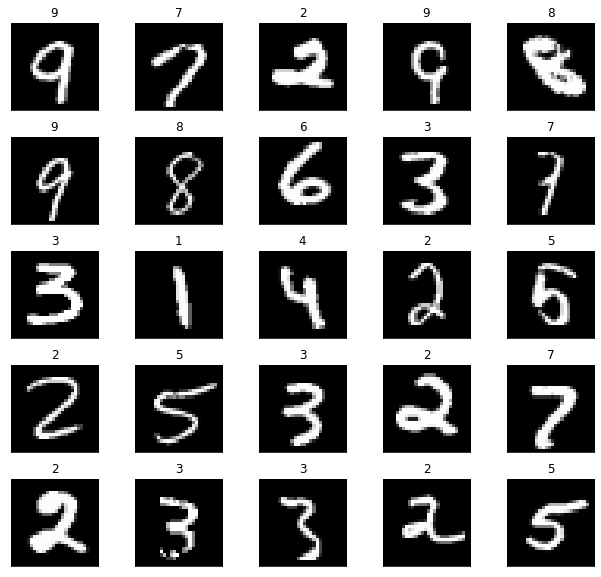

In [ ]:
#002 データセットの確認
########################################

# 手書文字(mnist)のデータセットを取得する
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 情報確認
print("情報確認：")
print("x_train：　%s" % str(x_train.shape))
print("x_test：　%s" % str(x_test.shape))
print("y_train：　%s" % str(y_train.shape))
print("y_test：　%s" % str(y_test.shape))
print()
print()

# データ内容の確認
print("x_train, y_trainの内容：")
fig = plt.figure(figsize=(20,10))
fig.subplots_adjust(hspace=0.3, wspace=-0.8)
for i in range(25):
    idx = np.random.randint(0, len(x_train))
    ax = fig.add_subplot(5, 5, i+1, xticks=[], yticks=[], title=y_train[idx])
    ax.imshow(x_train[idx], cmap='gray')
plt.show()
print()
print()
print("x_test, y_test")
fig = plt.figure(figsize=(20,10))
fig.subplots_adjust(hspace=0.3, wspace=-0.8)
for i in range(25):
    idx = np.random.randint(0, len(x_test))
    ax = fig.add_subplot(5, 5, i+1, xticks=[], yticks=[], title=y_test[idx])
    ax.imshow(x_test[idx], cmap='gray')
plt.show()
print()
print()


In [ ]:
#003 データの前処理
########################################

# 学習に都合が良い形にデータをリサイズ
x_train  = x_train.reshape(x_train.shape[0], 784)
x_test  = x_test.reshape(x_test.shape[0], 784)
y_train = keras.utils.to_categorical(y_train, 10)
y_test  = keras.utils.to_categorical(y_test, 10)

# 数値を0〜1.0の範囲に正規化
x_train = (x_train - x_train.min()) / (x_train.max() - x_train.min())
x_test = (x_test - x_test.min()) / (x_test.max() - x_test.min())


# 例１．中間の層がないニューラルネットワーク

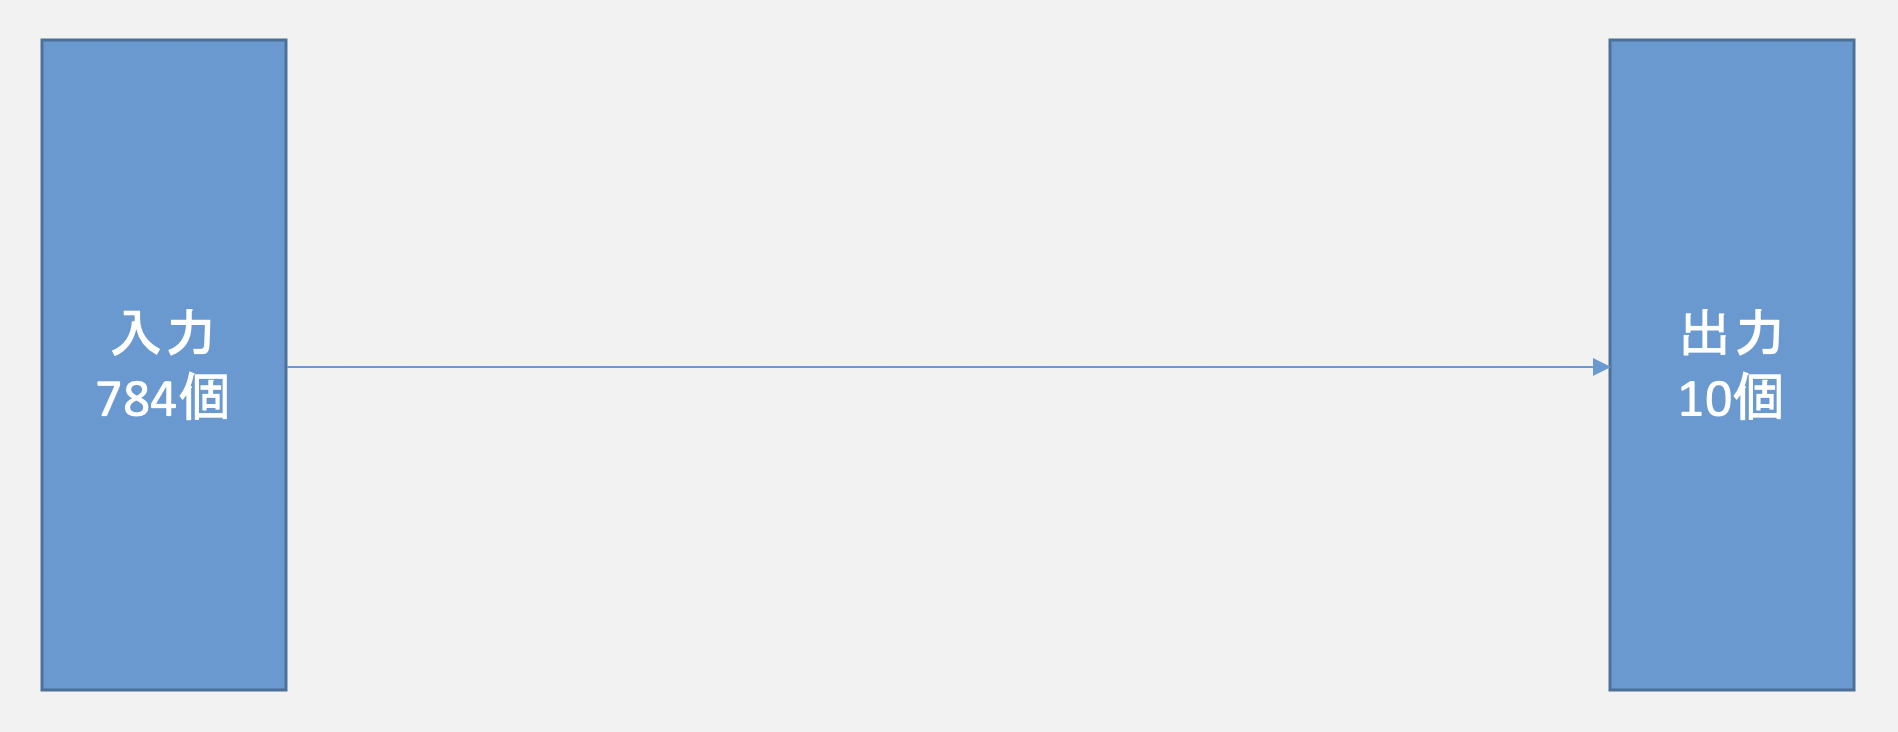

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 1s 21us/step - loss: 0.6827 - accuracy: 0.8314 - val_loss: 0.3825 - val_accuracy: 0.9023
Epoch 2/10
60000/60000 [==============================] - 1s 19us/step - loss: 0.3632 - accuracy: 0.9022 - val_loss: 0.3189 - val_accuracy: 0.9129
Epoch 3/10
60000/60000 [==============================] - 1s 20us/step - loss: 0.3200 - accuracy: 0.9121 - val_loss: 0.2981 - val_accuracy: 0.9181
Epoch 4/10
60000/60000 [==============================] - 1s 20us/step - loss: 0.3005 - accuracy: 0.9165 - val_loss: 0.2856 - val_accuracy: 0.9206
Epoch 5/10
60000/60000 [==============================] - 1s 20us/step - loss: 0.2883 - accuracy: 0.9196 - val_loss: 0.2788 - val_accuracy: 0.9232
Epoch 6/10
60000/60000 [==============================] - 1s 20us/step - loss: 0.2800 - accuracy: 0.9213 - val_loss: 0.2740 - val_accuracy: 0.9232
Epoch 7/10
60000/60000 [==============================] - 1s 20us/st

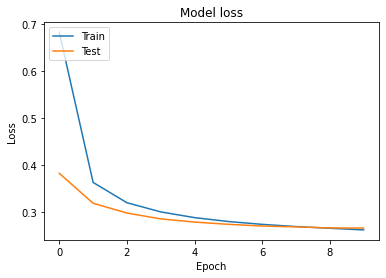

In [ ]:
# ニューラルネットワークモデルの構築
model = Sequential()
model.add(InputLayer(input_shape=(784, )))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 10エポック学習する
epochs = 10
batch_size = 128
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# 例２．値が１００個の中間層が3個あるニューラルネットワーク

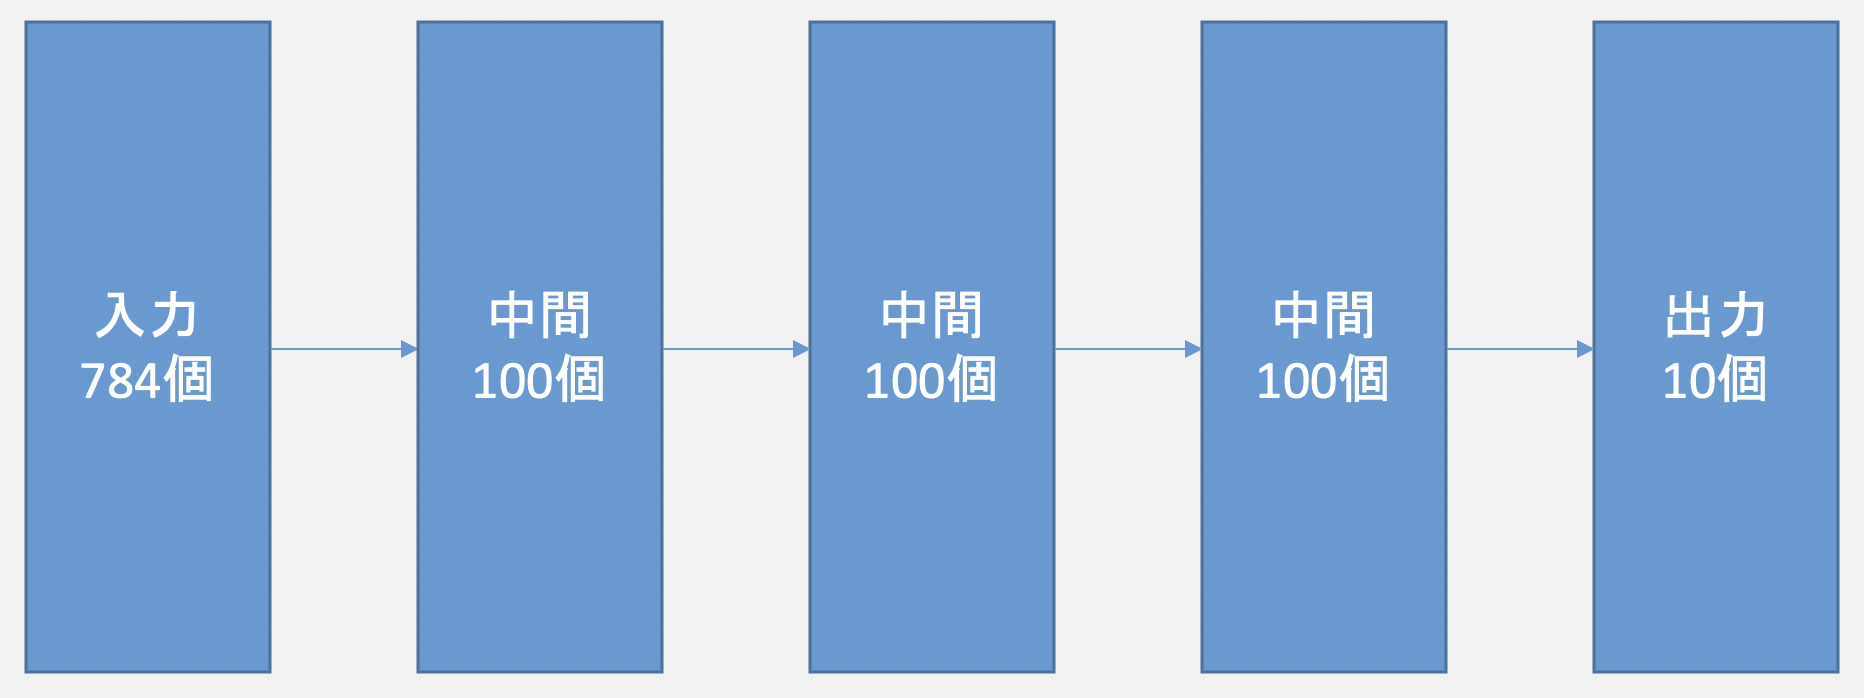

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 49us/step - loss: 0.3314 - accuracy: 0.9028 - val_loss: 0.1547 - val_accuracy: 0.9539
Epoch 2/10
60000/60000 [==============================] - 3s 47us/step - loss: 0.1294 - accuracy: 0.9610 - val_loss: 0.1229 - val_accuracy: 0.9616
Epoch 3/10
60000/60000 [==============================] - 3s 46us/step - loss: 0.0903 - accuracy: 0.9718 - val_loss: 0.0922 - val_accuracy: 0.9706
Epoch 4/10
60000/60000 [==============================] - 3s 46us/step - loss: 0.0684 - accuracy: 0.9792 - val_loss: 0.0870 - val_accuracy: 0.9722
Epoch 5/10
60000/60000 [==============================] - 3s 46us/step - loss: 0.0538 - accuracy: 0.9829 - val_loss: 0.0893 - val_accuracy: 0.9726
Epoch 6/10
60000/60000 [==============================] - 3s 47us/step - loss: 0.0429 - accuracy: 0.9865 - val_loss: 0.0887 - val_accuracy: 0.9745
Epoch 7/10
60000/60000 [==============================] - 3s 47us/st

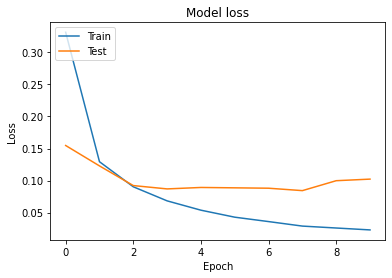

In [ ]:
# ニューラルネットワークモデルの構築
model = Sequential()
model.add(InputLayer(input_shape=(784, )))
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 10エポック学習する
epochs = 10
batch_size = 128
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# 自分で工夫してみたディープラーニングモデル！（目標99%！)

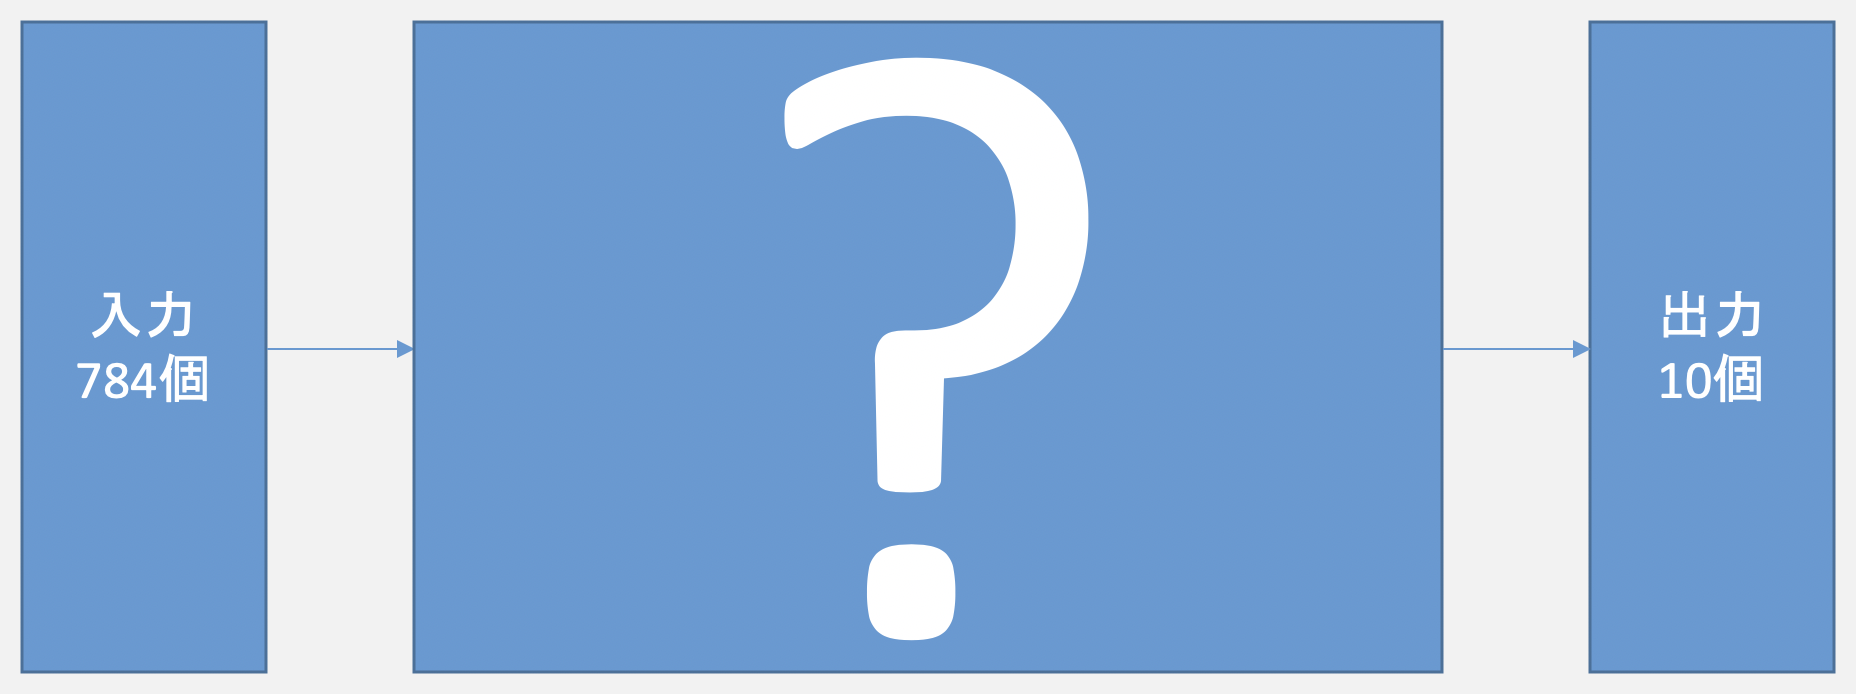

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 57us/step - loss: 0.3058 - accuracy: 0.9109 - val_loss: 0.1645 - val_accuracy: 0.9504
Epoch 2/10
60000/60000 [==============================] - 3s 53us/step - loss: 0.1189 - accuracy: 0.9635 - val_loss: 0.1085 - val_accuracy: 0.9674
Epoch 3/10
60000/60000 [==============================] - 3s 54us/step - loss: 0.0820 - accuracy: 0.9743 - val_loss: 0.0941 - val_accuracy: 0.9696
Epoch 4/10
60000/60000 [==============================] - 3s 54us/step - loss: 0.0633 - accuracy: 0.9798 - val_loss: 0.0873 - val_accuracy: 0.9733
Epoch 5/10
60000/60000 [==============================] - 3s 54us/step - loss: 0.0495 - accuracy: 0.9839 - val_loss: 0.0768 - val_accuracy: 0.9762
Epoch 6/10
60000/60000 [==============================] - 3s 54us/step - loss: 0.0401 - accuracy: 0.9874 - val_loss: 0.0827 - val_accuracy: 0.9750
Epoch 7/10
60000/60000 [==============================] - 3s 54us/st

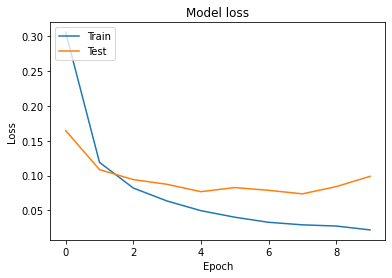

In [ ]:
# ニューラルネットワークモデルの構築
model = Sequential()
model.add(InputLayer(input_shape=(784, )))
model.add(Dense(100, activation='relu'))
model.add(Dense(150, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 10エポック学習する
epochs = 10
batch_size = 128
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

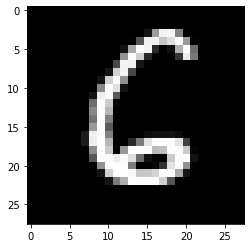

In [ ]:
# 入力を決める：何番目のデータが良い？
N = 98
input = x_test[N].reshape(28, 28)
plt.imshow(input, cmap='gray')
plt.show()

In [ ]:
# 作ったAIで数字認識してみる！
number = np.argmax(model.predict(input.reshape(1, 784)))
print("認識結果は「 %d 」です！！" % number)

認識結果は「 6 」です！！
